In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.rcParams['lines.linewidth'] = 2
import numpy as np
from scipy.optimize import minimize
import GPy

## Create Dataset

In [3]:
def heaviside(x):
    """See http://stackoverflow.com/a/15122658/554319"""
    y = 0.5 * (np.sign(x) + 1)
    y[np.diff(y) >= 0.5] = np.nan
    return y

X = 0.5*np.random.randn(20, 1)
y = heaviside(X)

## Setup GP Model

In [4]:
mapping = GPy.mappings.MLP(input_dim=1, output_dim=2, hidden_dim=[6, 6])
H = mapping.f(X)

kern = GPy.kern.RBF(1)
model = GPy.models.GPRegression(H, y, kern)
print model


Name                 : GP regression
Log-likelihood       : -22.4858914563
Number of Parameters : 3
Parameters:
  GP_regression.           |  Value  |  Constraint  |  Prior  |  Tied to
  rbf.variance             |    1.0  |     +ve      |         |         
  rbf.lengthscale          |    1.0  |     +ve      |         |         
  Gaussian_noise.variance  |    1.0  |     +ve      |         |         


## Optimize Hyperparameters

In [13]:
def nlml_callback(theta):
    mapping._set_params(theta[0:68])
    H = mapping.f(X)
    model.set_X(H)
    model[:] = theta[68:71]
    return -model.log_likelihood()


def nlml_grad_callback(theta):
    mapping._set_params(theta[0:68])
    H = mapping.f(X)
    model.set_X(H)
    model[:] = theta[68:71]
    dL_dK = model.grad_dict['dL_dK']
    dL_dH = kern.gradients_X(dL_dK, model.X)
    dL_dtheta = mapping.df_dtheta(dL_dH, X)
    return np.append(-dL_dtheta, -model.gradient)

theta0 = np.append(np.random.randn(68), np.ones(3))
mlp_bounds = (-200, 200)
gp_bounds = ((0.01, 100), (0.01, 100), (1e-6, 10))
bounds = 68*(mlp_bounds,)+gp_bounds
opt = minimize(nlml_callback, theta0, (), 'L-BFGS-B', nlml_grad_callback,
               None, None, bounds)
print opt
print model

   status: 0
  success: True
     nfev: 96
 hess_inv: <71x71 LbfgsInvHessProduct with dtype=float64>
      fun: -83.258490532191914
        x: array([ -1.32941630e+00,   6.96422251e+00,   1.57175447e+00,
        -6.65403824e+00,  -1.16240550e+00,  -3.41462308e+00,
        -1.26609617e-01,  -5.35150272e-01,   4.31650956e+00,
         2.37552026e+00,  -3.55973502e+00,   5.13098928e-01,
         7.62337741e-01,  -3.00302619e-01,  -6.48247827e+00,
         2.31779851e+00,   1.84250485e+01,   8.47638708e-01,
         3.29156453e-01,  -2.05556154e-01,   6.71424354e+00,
        -2.09875833e+00,  -1.79323538e+01,  -1.66072145e+00,
         1.97464723e+00,  -1.44127933e+00,   2.67695540e+00,
         3.84113581e+00,  -4.87261473e+00,  -1.55152578e+00,
        -1.08993359e+00,  -8.78735016e-02,   2.26715665e-01,
         1.34505667e+00,  -7.98870550e+00,   5.85901296e-01,
        -5.33408471e-01,   1.39287773e-01,  -1.26813015e+00,
        -2.79050649e+00,   1.04881947e+01,  -4.09884514e-02,
   

## Plot Results

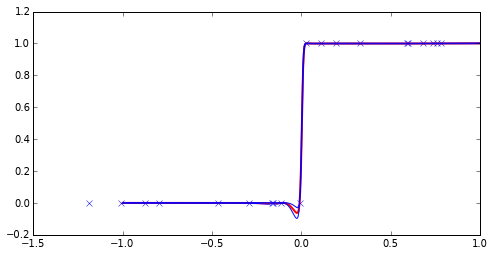

In [14]:
Xnew = np.linspace(-1, 1, 500).reshape(500, 1)
Hnew = mapping.f(Xnew)
mean, var = model.predict(Hnew)
plt.plot(X, y, 'x')
plt.plot(Xnew, mean,'r')
plt.plot(Xnew, mean+2*np.sqrt(var),'b',linewidth=1)
plt.plot(Xnew, mean-2*np.sqrt(var),'b',linewidth=1)

Converged=True
Converged=True
Converged=True
Converged=True
Converged=True


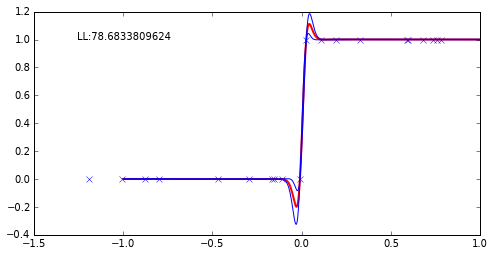

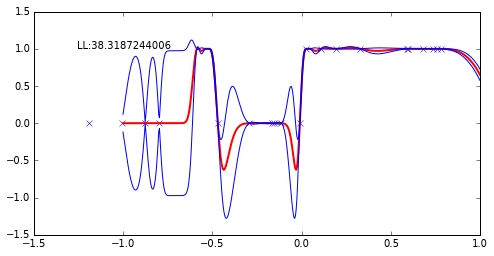

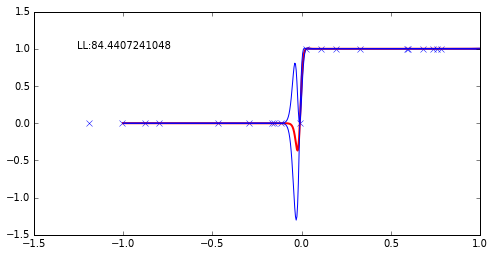

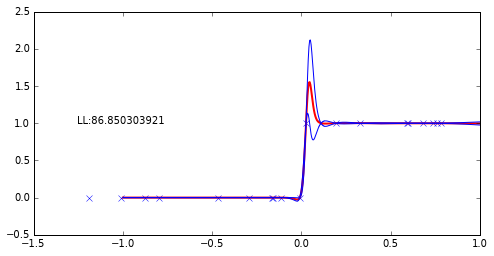

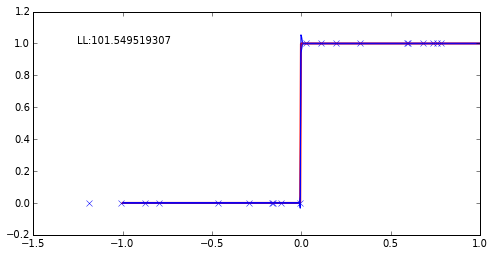

In [36]:
for i in range(5):
    try:
        theta0 = np.append(np.random.randn(68), np.ones(3))
        nlml_callback(theta0)
        opt = minimize(nlml_callback, theta0, (), 'L-BFGS-B', nlml_grad_callback,
                       None, None, bounds)
        print 'Converged='+str(opt.success)
        Hnew = mapping.f(Xnew)
        mean, var = model.predict(Hnew)
        plt.figure(i)
        plt.text(-1.25,1,'LL:'+str(model.log_likelihood()))
        plt.plot(X, y, 'x')
        plt.plot(Xnew, mean,'r')
        plt.plot(Xnew, mean+2*np.sqrt(var),'b',linewidth=1)
        plt.plot(Xnew, mean-2*np.sqrt(var),'b',linewidth=1)
    except:
        print "Opt error"


In [22]:
opt.status


0